<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Post ID    1000 non-null   int64 
 1   Content    1000 non-null   object
 2   Post Date  1000 non-null   object
 3   User ID    1000 non-null   int64 
 4   Likes      1000 non-null   int64 
 5   Shares     1000 non-null   int64 
 6   Category   1000 non-null   object
 7   Source     1000 non-null   object
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


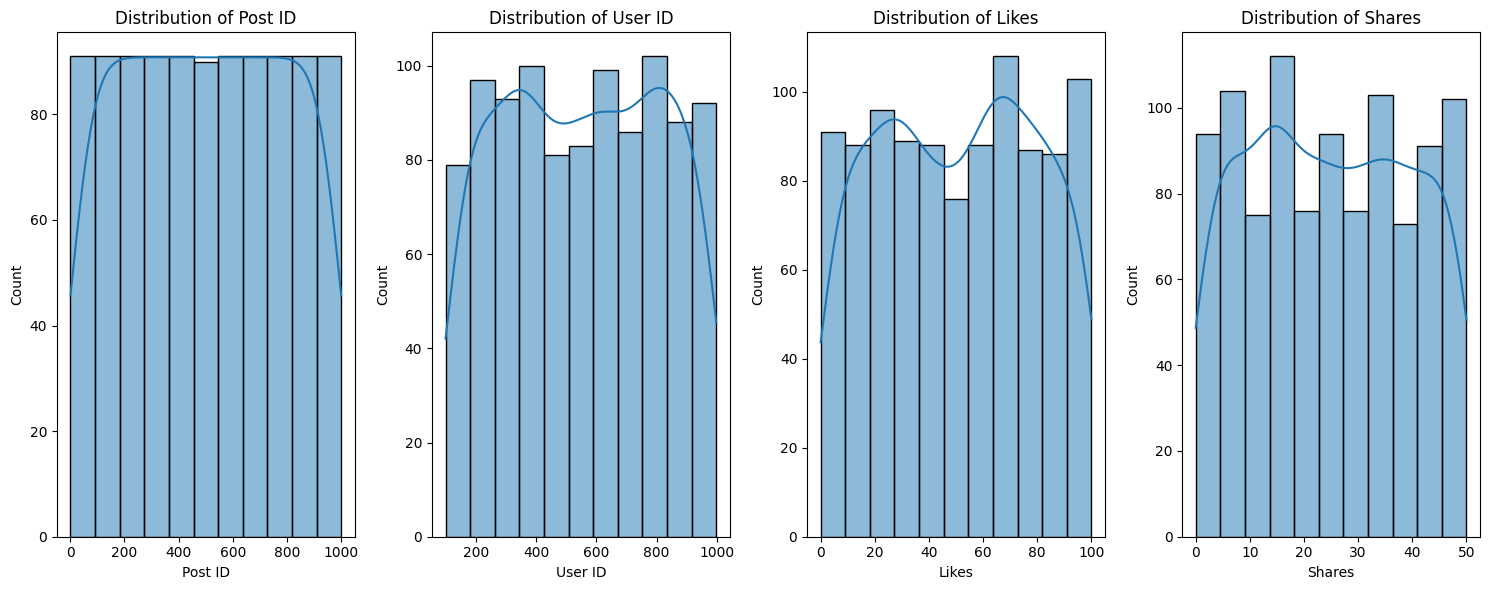

(None,
    Post ID                                            Content   Post Date  \
 0        1         Win a free live by clicking this link now!  2023-09-10   
 1        2        Win a free claim by clicking this link now!  2022-12-21   
 2        3  Unbelievable story of how a mention changed th...  2022-12-30   
 3        4  Unbelievable story of how a catch changed the ...  2023-11-12   
 4        5  Unbelievable story of how a question changed t...  2023-10-01   
 
    User ID  Likes  Shares   Category        Source  
 0      175     71      15       Spam           Bot  
 1      114     56      48       Spam           Bot  
 2      660     24      23  Fake News  Organization  
 3      746     17      40  Fake News    Individual  
 4      820     15      20  Fake News    Individual  )

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/social_media_fake_news_dataset.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()

# Display the first few rows of the dataset for a quick overview
data_head = data.head()

# Generate some basic visualizations
plt.figure(figsize=(15, 6))

# Plot for distribution of numerical data if any
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

data_info, data_head

In [2]:
# Data Cleaning Steps
# 1. Checking for missing values
missing_values = data.isnull().sum()

# 2. Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# 3. Converting 'Post Date' to datetime format for better analysis
data['Post Date'] = pd.to_datetime(data['Post Date'])

# 4. Check for any obvious inconsistencies in categorical data
category_values = data['Category'].value_counts()
source_values = data['Source'].value_counts()

# Prepare a summary of the cleaning steps
cleaning_summary = {
    "Missing Values": missing_values,
    "Duplicate Rows": duplicate_rows,
    "Category Values": category_values,
    "Source Values": source_values
}

cleaning_summary

{'Missing Values': Post ID      0
 Content      0
 Post Date    0
 User ID      0
 Likes        0
 Shares       0
 Category     0
 Source       0
 dtype: int64,
 'Duplicate Rows': 0,
 'Category Values': Legitimate    342
 Spam          333
 Fake News     325
 Name: Category, dtype: int64,
 'Source Values': Individual      339
 Bot             334
 Organization    327
 Name: Source, dtype: int64}

In [3]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=9de401f9a97aaddc72618e302d446238626be3b35b78f8a9da7f97af6e30d710
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
anomaly_data = data[['Likes', 'Shares']]
anomaly_data_scaled = scaler.fit_transform(anomaly_data)

In [5]:
from pyod.models.iforest import IForest

# Initialize Isolation Forest
iforest = IForest(contamination=0.1) # Contamination is the expected proportion of outliers in the data

# Fit the model
iforest.fit(anomaly_data_scaled)

# Predict the anomalies
anomalies = iforest.predict(anomaly_data_scaled)

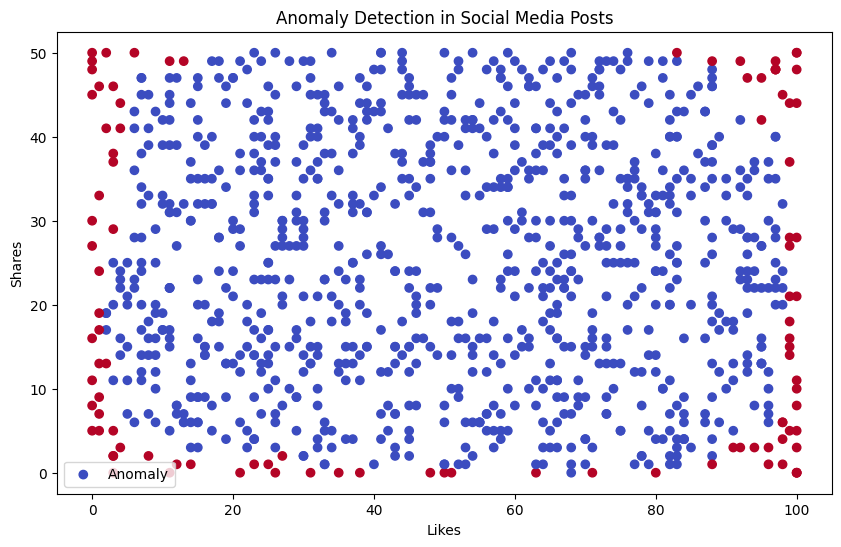

In [6]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Likes'], data['Shares'], c=anomalies, cmap='coolwarm', label='Anomaly')
plt.xlabel('Likes')
plt.ylabel('Shares')
plt.title('Anomaly Detection in Social Media Posts')
plt.legend()
plt.show()